In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    average_precision_score, precision_recall_curve, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [7]:
df = pd.read_excel("Sales Dataset.xlsx")

In [8]:
print(df.shape)
df.head()

(78025, 13)


,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [9]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              78025 non-null

In [10]:
df['Opportunity Status'] = df['Opportunity Status'].map({'Loss':0, 'Won':1})

Text(0.5, 1.0, 'Won vs Loss Distribution')

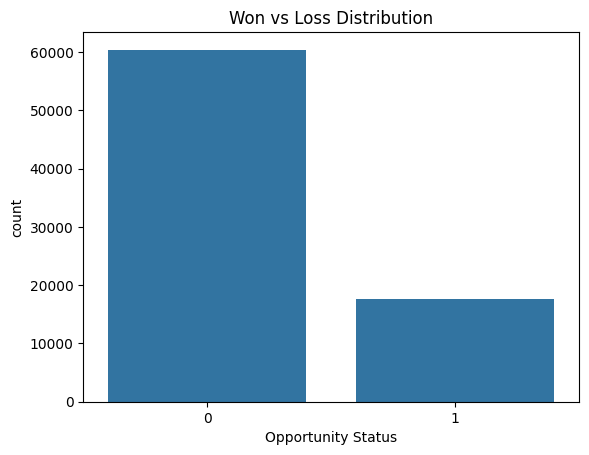

In [11]:
sns.countplot(x="Opportunity Status", data=df)
plt.title("Won vs Loss Distribution")

array([[<Axes: title={'center': 'Sales Velocity'}>,
        <Axes: title={'center': 'Sales Stage Iterations'}>],
       [<Axes: title={'center': 'Opportunity Size (USD)'}>, <Axes: >]],
      dtype=object)

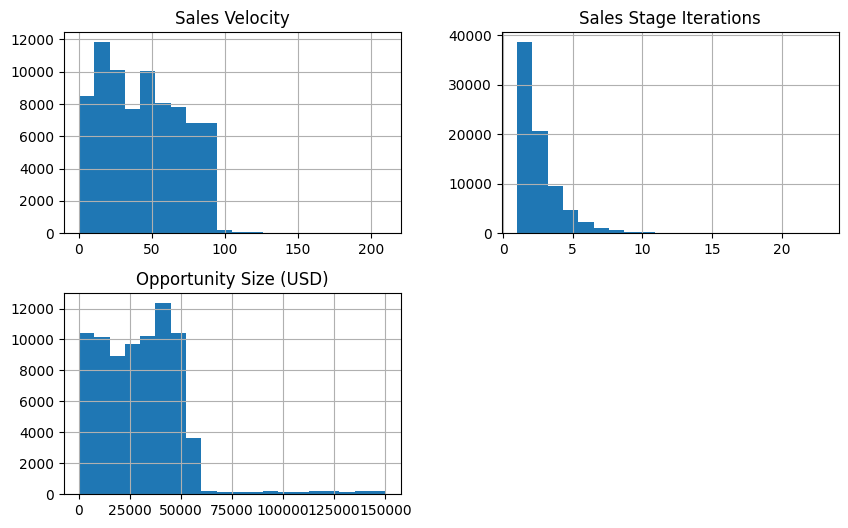

In [12]:
numeric_cols = ['Sales Velocity', 'Sales Stage Iterations', 'Opportunity Size (USD)']
df[numeric_cols].hist(bins=20, figsize=(10,6))

In [13]:
categorical_cols = ['Technology Primary','City','B2B Sales Medium',
                    'Client Revenue Sizing','Client Employee Sizing',
                    'Business from Client Last Year','Compete Intel',
                    'Opportunity Sizing']

In [18]:
print(df.columns.tolist())
    

['Opportunity ID', 'Technology\nPrimary', 'City', 'B2B Sales Medium', 'Sales Velocity', 'Opportunity Status', 'Sales Stage Iterations', 'Opportunity Size (USD)', 'Client Revenue Sizing', 'Client Employee Sizing', 'Business from Client Last Year', 'Compete Intel', 'Opportunity Sizing']


In [25]:
print(df['Opportunity Status'].unique())

[nan]


In [26]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=True)

print(df.columns.tolist())

['Opportunity ID', 'Technology Primary', 'City', 'B2B Sales Medium', 'Sales Velocity', 'Opportunity Status', 'Sales Stage Iterations', 'Opportunity Size (USD)', 'Client Revenue Sizing', 'Client Employee Sizing', 'Business from Client Last Year', 'Compete Intel', 'Opportunity Sizing', 'Opportunity_Status_Num']


In [27]:
df['Opportunity Status'] = df['Opportunity Status'].astype(str).str.strip()

print(df['Opportunity Status'].unique())

['nan']


In [30]:
import pandas as pd

df = pd.read_excel("Sales Dataset.xlsx", header=0)  
print(df.head())
print(df.columns.tolist())

  Opportunity ID           Technology\nPrimary       City    B2B Sales Medium  \
0      N00000001            ERP Implementation  Bengaluru           Marketing   
1      N00000002            ERP Implementation      Delhi  Enterprise Sellers   
2      N00000003  Technical Business Solutions      Delhi  Enterprise Sellers   
3      N00000004  Technical Business Solutions     Mumbai  Enterprise Sellers   
4      N00000005            ERP Implementation      Delhi  Enterprise Sellers   

   Sales Velocity Opportunity Status  Sales Stage Iterations  \
0              76                Won                      13   
1              63               Loss                       2   
2              24                Won                       7   
3              16               Loss                       5   
4              69               Loss                      11   

   Opportunity Size (USD) Client Revenue Sizing Client Employee Sizing  \
0                       0          More than 1M       

In [31]:
print(df['Opportunity Status'].unique())

['Won' 'Loss']


In [32]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              78025 non-null

C:\Users\asus\AppData\Local\Temp\ipykernel_5740\4164594214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Opportunity Status', palette='Set2')


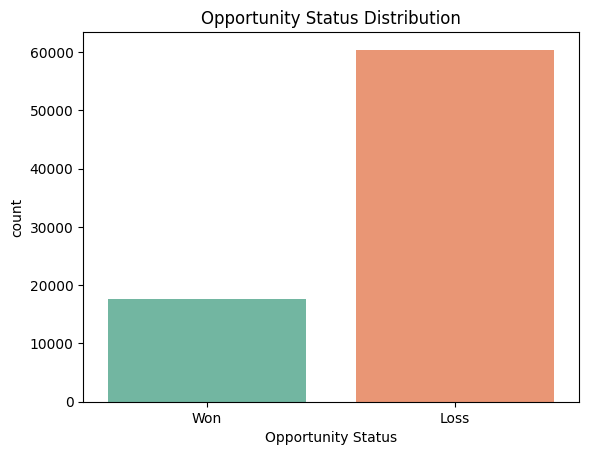

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Opportunity Status', palette='Set2')
plt.title("Opportunity Status Distribution")
plt.show()

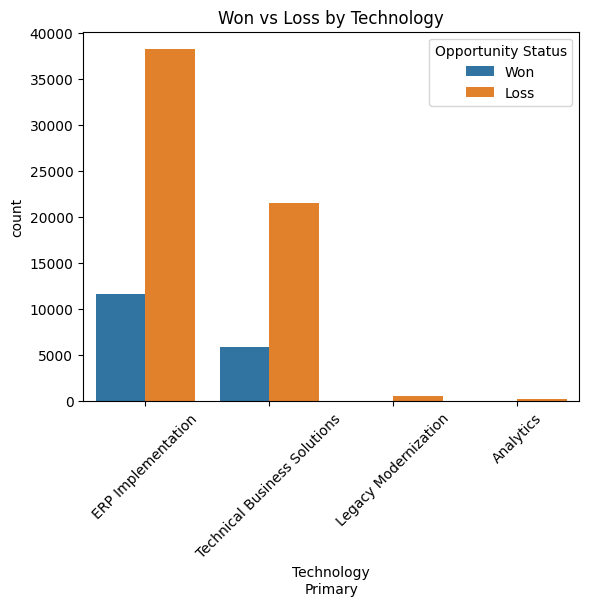

In [34]:
sns.countplot(data=df, x='Technology\nPrimary', hue='Opportunity Status')
plt.title("Won vs Loss by Technology")
plt.xticks(rotation=45)
plt.show()

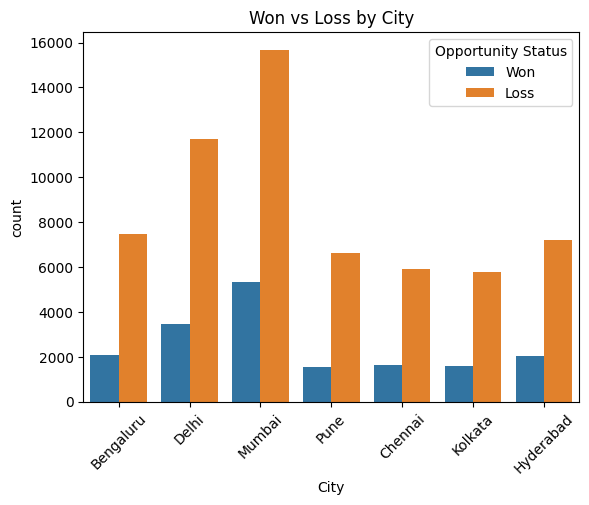

In [35]:
sns.countplot(data=df, x='City', hue='Opportunity Status')
plt.title("Won vs Loss by City")
plt.xticks(rotation=45)
plt.show()

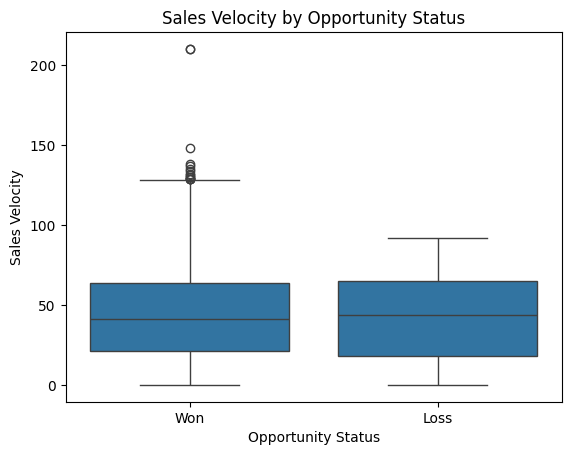

In [36]:
sns.boxplot(data=df, x='Opportunity Status', y='Sales Velocity')
plt.title("Sales Velocity by Opportunity Status")
plt.show()

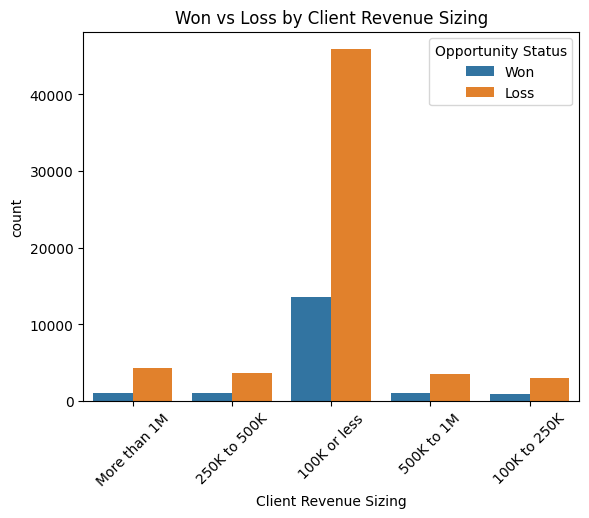

In [37]:
sns.countplot(data=df, x='Client Revenue Sizing', hue='Opportunity Status')
plt.title("Won vs Loss by Client Revenue Sizing")
plt.xticks(rotation=45)
plt.show()